In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import warnings

In [2]:
os.environ['OMP_NUM_THREADS'] = '1'
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL*")
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [12]:
def bkmeans(x_data, num_of_clusters, iterations):
    global cluster1, sse2, sse1, cluster2, leftover_indices
    normalized_x_data = (x_data - np.mean(x_data)) / np.std(x_data)
    final_indices = np.zeros((x_data.shape[0]))
    current_x_data = normalized_x_data
    min_sse = 0
    for i in range(1, num_of_clusters):
        for j in range(iterations):
            kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(current_x_data)
            current_sse = kmeans.inertia_
            if current_sse < min_sse or min_sse == 0:
                min_sse = current_sse
                cluster1, cluster2 = current_x_data[kmeans.labels_ == 0], current_x_data[kmeans.labels_ == 1]
                sse1, sse2 = np.sum((cluster1 - np.mean(cluster1))**2), np.sum((cluster2 - np.mean(cluster2))**2)
                leftover_indices = np.copy(final_indices[final_indices == 0])
                if sse1 > sse2:
                    leftover_indices[kmeans.labels_ == 1] = i
                else:
                    leftover_indices[kmeans.labels_ == 0] = i
        if sse1 > sse2:
            current_x_data = cluster1
        else:
            current_x_data = cluster2
        final_indices[final_indices == 0] = leftover_indices
    final_indices[final_indices == 0] = num_of_clusters
    return final_indices

In [13]:
result = bkmeans(X, 5, 20)

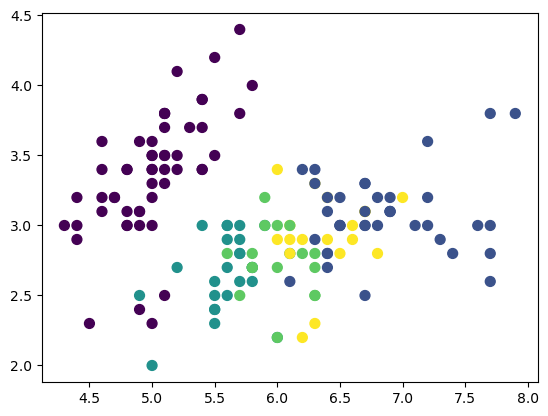

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=result, s=50, cmap='viridis')